In [21]:
# load the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [60]:
# load the dataset for the house price prediction
df = fetch_california_housing()
print(df)


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [16]:
## create a data frame consisting of the data 
dataset=pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
## split the dataset into independent and dependent variables
X=dataset
y=df.target

print('Independent variables : ',X.shape)
print('Target variable : ',y.shape)

Independent variables :  (20640, 8)
Target variable :  (20640,)


In [18]:
## train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print("Training set features shape:", X_train.shape)
print("Training set labels shape :", y_train.shape)
print("Test set features shape    :", X_test.shape)
print("Test set labels shape      :", y_test.shape)

Training set features shape: (14448, 8)
Training set labels shape : (14448,)
Test set features shape    : (6192, 8)
Test set labels shape      : (6192,)


In [22]:
## standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
## enabling cross-validation
regression = LinearRegression()
regression.fit(X_train,y_train)

mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print(mse)

## compute the mean of mse
mean_mse=np.mean(mse)
print(mean_mse)

[-0.56799593 -0.52918854 -0.48456478 -0.51627013 -0.54833859 -0.47884524
 -0.47828648 -0.55465187 -0.55647389 -0.54248888]
-0.5257104326777


In [25]:
## make predictions
reg_pred = regression.predict(X_test)
print(reg_pred)

[0.72604907 1.76743383 2.71092161 ... 2.07465531 1.57371395 1.82744133]


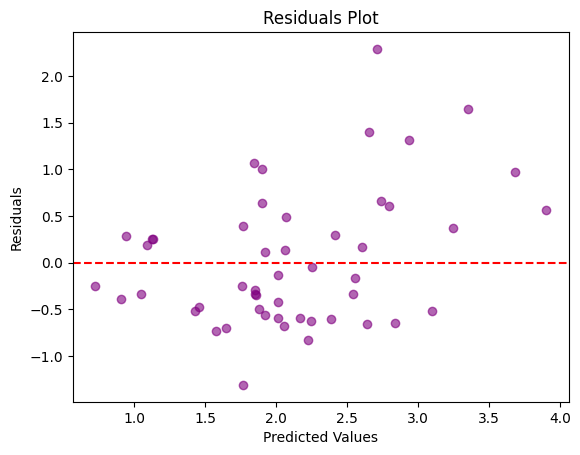

In [47]:
## residual plot
residuals = y_test - reg_pred
plt.scatter(reg_pred[:50], residuals[:50], color="purple", alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


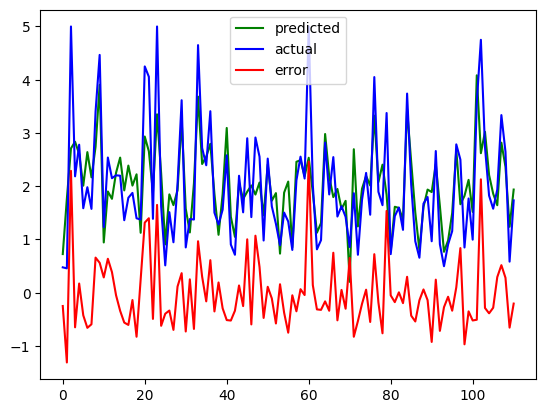

In [56]:
## compare the trends
arr = np.arange(len(X_test))

plt.plot(arr[:111],reg_pred[:111],color='green',label='predicted')
plt.plot(arr[:111],y_test[:111],color='blue',label='actual')
plt.plot(arr[:111],residuals[:111],color='red',label='error')
plt.legend()
plt.show()

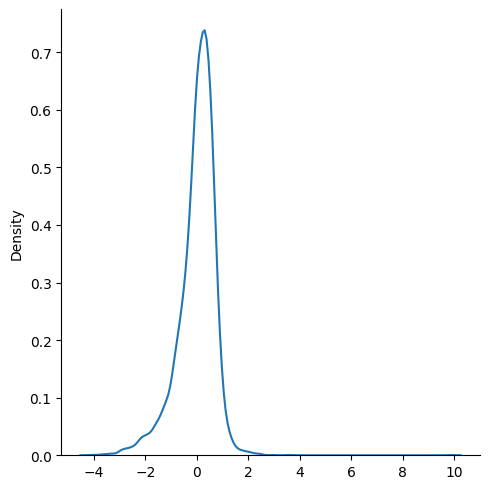

In [59]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')